In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

**ASSIGNMENT**-1

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Mobiletest.csv')


In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/Mobiletrain.csv')

In [ ]:
data.head()
data1.head()

In [ ]:
data.describe()
data1.describe()

In [ ]:
data.info()
data1.info()

In [10]:
from sklearn.preprocessing import MinMaxScaler
X_train = data1.drop('price_range', axis=1)
y_train = data1['price_range']
X_test = data.drop('id', axis=1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
price_ranges = len(data1['price_range'].unique())
print("no of Price Ranges:", price_ranges)

no of Price Ranges: 4


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(price_ranges, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1344      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,556
Trainable params: 3,556
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 1.3454 - accuracy: 0.3330
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 1.1180 - accuracy: 0.5595
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.8465 - accuracy: 0.7075
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.7790
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.8120
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8585
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8725
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8785
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8980
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9045
Epoch 11/

In [15]:
predictions = model.predict(X_test_scaled)

32/32 [==============================] - 0s 995us/step


In [16]:
predicted_price_ranges = predictions.argmax(axis=1)
print(predicted_price_ranges)

[3 3 3 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 1 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 2 0 3 1 3 1 1 3 3 3 0 1 1 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 3 0 2 1 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 2 0 2 1 1 3 1 1 0 3 2 1 3 1 2 2 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 3 3 1 2 3 2 3 2 2 1 0 0 1 3 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 1 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 1 0 3 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 3 0 0 3 1 2 0 2 2 3 0 3 0 2 3 2 3 0 2 0 2 2 0 1 2 0 0 1
 1 1 3 3 3 1 3 1 2 2 3 3 

**ASSIGNMENT-2**

In [17]:
db = keras.datasets.fashion_mnist

In [18]:
(X_train,y_train),(X_test,y_test) =db.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [19]:
len(X_train)

60000

In [20]:
len(X_test)

10000

In [21]:
X_train[0].shape

(28, 28)

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
y_train[0]

9

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

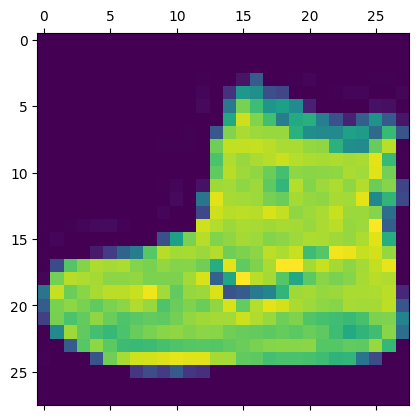

In [27]:
plt.matshow(X_train[0])

In [28]:
X_train = X_train/255

In [29]:
X_test = X_test/255

In [30]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [33]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5048 - accuracy: 0.8238


In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4550 - accuracy: 0.8351


[0.4550260305404663, 0.835099995136261]

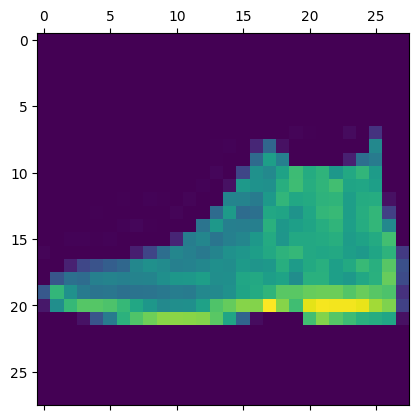

In [35]:
plt.matshow(X_test[0])

In [36]:
xy = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [37]:
np.argmax(xy[0])

9

In [38]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [39]:
class_labels[np.argmax(xy[0])]

'Ankle boot'

**ASSIGNMENT-3**

In [47]:
pg_data = pd.read_csv('/content/drive/MyDrive/penguins.csv')

In [48]:
pg_data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [49]:
pg_data.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [50]:
pg_data = pg_data.drop(['rowid', 'year','sex','island'], axis=1)

In [51]:
pg_data.dropna(inplace=True)

In [54]:
y=pg_data['species']

In [55]:
encoder = LabelEncoder()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [56]:
X = pg.drop(['species'], axis=1)
print(X)
y = pg['species']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
339            55.8           19.8              207.0       4000.0
340            43.5           18.1              202.0       3400.0
341            49.6           18.2              193.0       3775.0
342            50.8           19.0              210.0       4100.0
343            50.2           18.7              198.0       3775.0

[342 rows x 4 columns]
0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
34

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9780
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9817
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9890
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9927
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9927
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9927
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9963
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 11/100
9/9 [===========

In [61]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9855
Test loss: 0.0649
Test accuracy: 0.9855


**ASSIGNMENT-4**

In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [63]:
he=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [64]:
he.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [65]:
features = he.drop('output', axis=1)
target = he['output']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=(X_train.shape[1])),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=100, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.7502 - accuracy: 0.5372
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.5413
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5537
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.5661
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6322
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6736
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.6942
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7273
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7355
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7727
Epoch 11/100
8/8 [===========

In [71]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.8197
Accuracy: 0.8196721076965332
